In [1]:
import pandas as pd

df = pd.read_csv("Task_1.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.Age = df.Age.fillna(df.Age.median())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked', 'PassengerId'], axis= 1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df.Sex = encoder.fit_transform(df.Sex)
df.head()  # 1 = Male
           # 0 = Female

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

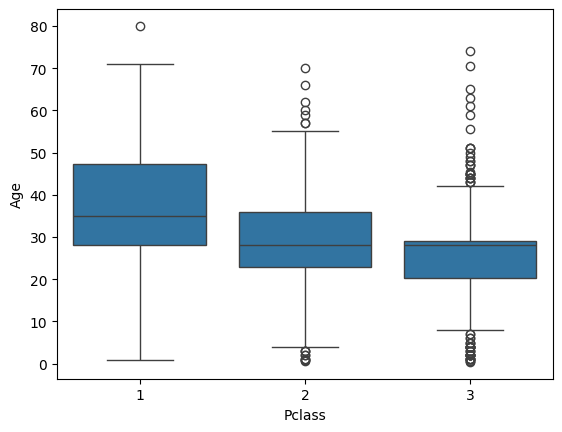

In [7]:
sns.boxplot(x=df.Pclass, y=df.Age)
plt.show()

In [8]:
x = df.drop(['Survived'], axis= 1)
y = df.Survived

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
model.score(X_test, y_test)

0.8156424581005587

In [13]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [14]:
print(model.predict([[2, 0, 39, 70000]]))

[1]


C:\Users\arnab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
model.predict_proba(X_test[: 10])

array([[0.52      , 0.48      ],
       [0.88805556, 0.11194444],
       [0.07624373, 0.92375627],
       [0.97104365, 0.02895635],
       [0.7       , 0.3       ],
       [0.61      , 0.39      ],
       [1.        , 0.        ],
       [0.125     , 0.875     ],
       [0.85      , 0.15      ],
       [0.41      , 0.59      ]])

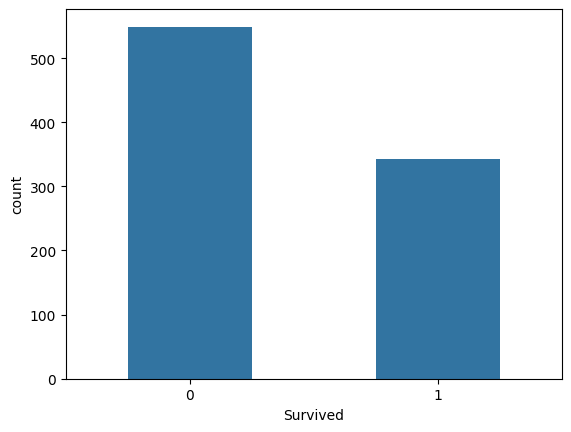

In [16]:
sns.countplot(x=df.Survived, width= 0.5)
plt.show()

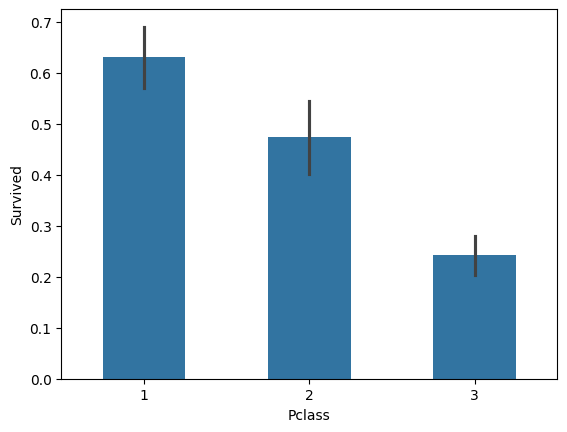

In [17]:
sns.barplot(x=df.Pclass, y=df.Survived, width= 0.5)
plt.show()


In [18]:
x = df[df['Survived'] == True]['Pclass'].value_counts()
print("Total Number Of Passengers Survived In Each Class:\n", x)

Total Number Of Passengers Survived In Each Class:
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64


In [19]:
y = df[df['Survived'] == 1].groupby('Sex').size()
print("Total Number Of Survivor On The Basis Of Gender:\n", y)

Total Number Of Survivor On The Basis Of Gender:
 Sex
0    233
1    109
dtype: int64
